## **Problem Statement**

To maintain transparency with their clients, food delivery services such as Zomato and Swiggy need to indicate the precise time it will take to deliver your order. Based on how long delivery partners have previously taken to deliver the same distance, these businesses employ machine learning algorithms to forecast when food will be delivered.

We must determine the distance between the location of food preparation and the location of food consumption in order to forecast the meal delivery time in real-time. Once the distance between the restaurant and the delivery locations has been determined, we must determine the correlations between the time it took delivery partners to deliver the food over the same distance in the past.


## **Understanding the data**

#### **Importing the required Libraries**

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import folium
import math

# for ignoring warning
import warnings
warnings.filterwarnings("ignore")


# displaying each column and row
pd.set_option('display.max_columns',None)
pd.set_option("display.max_rows", None)

##### **Checking the data**

#### **Loading the dataset**

In [169]:
df = pd.read_csv("data/finalTrain.csv")

In [170]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [171]:
# checking the shape of the data
df.shape

(45584, 20)

- Number of rows: 45584
- Number of columns: 20

##### **Type and name of features in the data**

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [173]:
categorical_count = 0
numerical_count = 0

for col in df.columns:
    if col in df.select_dtypes(include="object"):
        categorical_count += 1
    else:
        numerical_count += 1

print("Number of numerical features: ", numerical_count)
print("Number of categorical features: ", categorical_count)

Number of numerical features:  9
Number of categorical features:  11


- There are 11 categorical features
- 9 numerical features
    - 2 -> Interger value features
    - 7 -> Float value features

##### **Missing values**

In [174]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [175]:
# checking percentages of missing values in each feature
for col in df.columns:
    if df[col].isnull().sum() > 0:
        percentage = (df[col].isnull().sum()/df.shape[0])*100
        print(f"---------[{col}]---------")
        print(f"Number of missing values : {df[col].isnull().sum()}")
        print(f"Percentage : {round(percentage,2)}%\n")

---------[Delivery_person_Age]---------
Number of missing values : 1854
Percentage : 4.07%

---------[Delivery_person_Ratings]---------
Number of missing values : 1908
Percentage : 4.19%

---------[Time_Orderd]---------
Number of missing values : 1731
Percentage : 3.8%

---------[Weather_conditions]---------
Number of missing values : 616
Percentage : 1.35%

---------[Road_traffic_density]---------
Number of missing values : 601
Percentage : 1.32%

---------[multiple_deliveries]---------
Number of missing values : 993
Percentage : 2.18%

---------[Festival]---------
Number of missing values : 228
Percentage : 0.5%

---------[City]---------
Number of missing values : 1200
Percentage : 2.63%



As the total number of values are 45584, the missing values are quite high. 

##### **Checking for duplicated values**

In [176]:
df.duplicated().sum()

0

There no duplicates in the data.

##### **Checking unique values**

In [177]:
df.nunique()

ID                             45584
Delivery_person_ID              1320
Delivery_person_Age               22
Delivery_person_Ratings           28
Restaurant_latitude              657
Restaurant_longitude             518
Delivery_location_latitude      4373
Delivery_location_longitude     4373
Order_Date                        44
Time_Orderd                      176
Time_Order_picked                193
Weather_conditions                 6
Road_traffic_density               4
Vehicle_condition                  4
Type_of_order                      4
Type_of_vehicle                    4
multiple_deliveries                4
Festival                           2
City                               3
Time_taken (min)                  45
dtype: int64

In [178]:
# creating a dataframe for dataset understanding

def basicInfo_data(dataframe):
    ''' 
    This function will provide the basic information (number of missing values, missing value percentage, unique value count, datatype of the feature) about the dataset.
    Input: DataFrame
    Output: DataFrame
    '''
    Features = []
    Missing_values = []
    Unique_value_count = []
    Missing_values_percentage = []
    datatype = []

    for col in dataframe.columns:
        Features.append(col)
        Missing_values.append(dataframe[col].isnull().sum())
        Missing_values_percentage.append(round((dataframe[col].isnull().sum()/dataframe.shape[0])*100,2))
        Unique_value_count.append(dataframe[col].nunique())
        datatype.append(dataframe[col].dtype)

    # filling the dataframe
    temp_df = pd.DataFrame({
        "Features": Features,
        "Missing_values":Missing_values,
        "Missing_value_percentage":Missing_values_percentage,
        "Unique_value_count":Unique_value_count,
        "Datatype":datatype 
    }) 

    # display the dataframe
    return temp_df

In [179]:
basicInfo_data(dataframe=df)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,ID,0,0.00,45584,object
1,Delivery_person_ID,0,0.00,1320,object
2,Delivery_person_Age,1854,4.07,22,float64
3,Delivery_person_Ratings,1908,4.19,28,float64
4,Restaurant_latitude,0,0.00,657,float64
5,Restaurant_longitude,0,0.00,518,float64
6,Delivery_location_latitude,0,0.00,4373,float64
7,Delivery_location_longitude,0,0.00,4373,float64
8,Order_Date,0,0.00,44,object
9,Time_Orderd,1731,3.80,176,object


##### **Checking the statistics of the features**

In [180]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


**`Delivery_person_Age:`**

- With the presence of approx 4.07% of missing values the average age of the delivery person is 29.
- The maximum age is 50 years.
- The minimum age is 15 years.

**`Time_taken(min)`**

- The average time taken by the delivery person for the delivery is approx. 26 minutes.
- The maximum time taken is 54 minutes.
- Whereas the minimum time taken is 10 minutes, this might be becuse of the short distance between the restaurant location and the receiver's location.

## **Pre-processing**

In [181]:
# creating a copy of the data
data = df.copy()

In [182]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


Droping features that are not required in predicting the delivery time.

**Columns ->** ID, Delivery_person_Age

In [183]:
data.drop(columns=["ID"], axis=1 ,inplace=True)

In [184]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [185]:
data.shape

(45584, 19)

**Preprocessing the `Order_date` feature**

In [186]:
data['Order_Date'].value_counts()

Order_Date
15-03-2022    1192
03-04-2022    1178
13-03-2022    1169
26-03-2022    1165
24-03-2022    1162
09-03-2022    1159
05-04-2022    1156
05-03-2022    1154
07-03-2022    1153
03-03-2022    1150
21-03-2022    1149
11-03-2022    1148
19-03-2022    1148
30-03-2022    1141
01-03-2022    1140
28-03-2022    1139
17-03-2022    1134
01-04-2022    1133
02-03-2022    1012
10-03-2022     996
16-03-2022     995
20-03-2022     993
02-04-2022     992
06-03-2022     986
04-03-2022     980
29-03-2022     977
25-03-2022     974
14-03-2022     973
11-02-2022     970
18-03-2022     968
31-03-2022     967
27-03-2022     965
08-03-2022     964
12-03-2022     964
23-03-2022     964
06-04-2022     961
13-02-2022     957
15-02-2022     945
04-04-2022     941
17-02-2022     939
12-02-2022     864
16-02-2022     861
18-02-2022     855
14-02-2022     851
Name: count, dtype: int64

In [187]:
data['Order_Date'].dtype

dtype('O')

Since the dates stored in `Order_date` column are of object type, thus changing the datatype of this column. 

Creating 3 new columns from this column: 
- year
- month
- day

In [188]:
# Converting dtype
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format="%d-%m-%Y")

# Creating new columns
data['Year'] = data['Order_Date'].dt.year
data['Month'] = data['Order_Date'].dt.month
data['Day'] = data['Order_Date'].dt.day

# droping the Order_date column
data.drop(columns='Order_Date', axis=1, inplace=True)

In [189]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [190]:
basicInfo_data(dataframe=data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,1854,4.07,22,float64
2,Delivery_person_Ratings,1908,4.19,28,float64
3,Restaurant_latitude,0,0.00,657,float64
4,Restaurant_longitude,0,0.00,518,float64
5,Delivery_location_latitude,0,0.00,4373,float64
6,Delivery_location_longitude,0,0.00,4373,float64
7,Time_Orderd,1731,3.80,176,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,616,1.35,6,object


**Pre-processing `Time_Ordered`**

This column have 3.80% of missing values. Since I don't have any technique to fill those missing values; T am droping the missing values rows

In [191]:
data.dropna(subset=['Time_Orderd'], inplace=True)

In [192]:
data['Time_Orderd'].isnull().sum()

0

In [193]:
data['Time_Orderd'].value_counts()

Time_Orderd
21:55          461
17:55          456
0.833333333    449
22:20          448
21:35          446
19:50          444
21:15          442
22:45          438
21:20          437
18:35          436
19:55          436
18:10          435
17:35          435
21:25          435
22:10          434
23:30          434
17:40          431
17:25          431
1              430
21:40          429
23:25          429
22:35          428
22:50          425
18:20          425
0.791666667    424
17:15          424
21:10          423
20:40          423
20:45          423
0.958333333    422
23:35          422
18:30          421
17:45          421
20:50          420
19:25          420
19:30          419
23:40          419
20:35          416
20:20          416
19:40          416
23:10          414
17:20          414
21:45          413
19:15          413
19:35          412
20:30          412
17:10          412
18:40          411
23:55          411
17:50          410
22:30          410
0.875          409


There are some values within this column that are not written correctly. For example: - **0.958333333, 0.5** or **1** etc.<br> Thus correcting them.

In [194]:
def extract_time(x):
    try:
        return x.split(":")[0]+ ":"+ x.split(":")[1][:2]
    except IndexError:
        return "00:00"
    

In [195]:
data["Time_Orderd"] = data['Time_Orderd'].apply(extract_time)

In [196]:
data["Time_Orderd"].value_counts().head(10)

Time_Orderd
00:00    4068
21:55     461
17:55     456
22:20     448
21:35     446
19:50     444
21:15     442
22:45     438
21:20     437
19:55     436
Name: count, dtype: int64

Changing the datatype and format of Time_Orderd column

In [197]:
# converting into datetime object
data["Time_Orderd"] = pd.to_datetime(data["Time_Orderd"], format="%H:%M", errors="coerce").dt.time

# creating a new column for TimeOrder_hours
data["TimeOrder_hours"] = data["Time_Orderd"].astype(str).str.split(":",expand=True)[0]

# replacing '0' with '00' 
data["TimeOrder_hours"] = data["TimeOrder_hours"].replace("0","00")

data["TimeOrder_hours"]=data["TimeOrder_hours"].astype('int32')

In [198]:
# order_minute
data["TimeOrder_min"]=data["Time_Orderd"].astype(str).str.split(":",expand=True)[1]

# changing the datatype
data["TimeOrder_min"]=data["TimeOrder_min"].astype("int32")

In [199]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55:00,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55:00,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30:00,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20:00,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50:00,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [200]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,268,0.61,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


**Pre-processing `Time_Order_picked` column**

In [201]:
data["Time_Order_picked"].value_counts()

Time_Order_picked
21:30          483
22:50          453
21:45          445
17:55          442
18:40          441
22:25          441
23:50          438
18:05          438
22:40          437
23:35          434
20:50          434
21:55          431
0.833333333    431
18:45          430
23:05          428
18:25          428
19:55          427
19:40          426
19:35          425
17:35          423
17:45          421
20:40          421
20:55          420
1              420
20:30          418
24:05:00       417
21:05          417
19:50          417
17:25          416
23:45          416
21:50          416
20:25          415
0.916666667    415
18:50          411
17:50          410
20:05          410
17:30          410
19:30          409
22:30          409
19:25          409
21:40          409
22:45          409
0.75           408
17:40          407
21:35          406
22:55          406
23:25          405
22:05          404
18:30          403
18:55          401
18:35          401
23:30        

In [202]:
data['Time_Order_picked'] = data['Time_Order_picked'].str.replace('.', ':')

# Define a lambda function with error handling
def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
data['Time_Order_picked'] = data['Time_Order_picked'].apply(extract_time)

# Convert the Order_Time column to a time data type
data['Time_Order_picked'] = pd.to_datetime(data['Time_Order_picked'], format='%H:%M',errors='ignore')

In [203]:
# # order_picked_hours
data['Time_Order_picked_Hour']=data['Time_Order_picked'].astype(str).str.split(':',expand=True)[0]

data['Time_Order_picked_Hour']=data['Time_Order_picked_Hour'].astype('int32')


# order_picked_minute
data['Time_Order_picked_min']=data['Time_Order_picked'].astype(str).str.split(':',expand=True)[1]

data['Time_Order_picked_min']=data['Time_Order_picked_min'].astype('int32')

In [204]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55:00,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55,22,10
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55:00,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55,15,5
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30:00,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30,17,40
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20:00,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20,9,30
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50:00,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50,20,5


In [205]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,268,0.61,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


**Pre-processing `multiple_deliveries` column**

In [206]:
data["multiple_deliveries"].value_counts()

multiple_deliveries
1.0    27060
0.0    13587
2.0     1920
3.0      343
Name: count, dtype: int64

The `multiple_deliveries` column is having 4 types of values (1.0, 0.0, 2.0 and 3.0). It has approx. 2.15% of missing values thus filling them with the mode.

In [207]:
# data["multiple_deliveries"].fillna(data["multiple_deliveries"].mode()[0], inplace=True)

In [208]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,268,0.61,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


**Pre-processing `Festival` column**

In [209]:
data['Festival'].value_counts()

Festival
No     42777
Yes      857
Name: count, dtype: int64

In [210]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,268,0.61,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


In [211]:
data.shape

(43853, 25)

**Pre-processing `City` column**

In [212]:
data["City"].value_counts()

City
Metropolitian    32796
Urban             9757
Semi-Urban         156
Name: count, dtype: int64

In [213]:
data.sample(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min
28209,BANGRES18DEL02,21.0,4.8,12.913041,77.683237,12.933041,77.703237,08:10:00,08:20,Cloudy,Low,2,Meal,scooter,1.0,No,Metropolitian,18,2022,3,3,8,10,8,20
16998,SURRES18DEL02,20.0,4.8,21.149834,72.778666,21.199834,72.828666,20:30:00,20:35,Fog,Jam,1,Drinks,motorcycle,0.0,No,Metropolitian,23,2022,3,28,20,30,20,35
28481,JAPRES11DEL02,35.0,4.8,26.902940,75.793007,26.982940,75.873007,19:55:00,20:10,Cloudy,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,44,2022,3,31,19,55,20,10
28349,PUNERES08DEL02,25.0,4.6,18.534080,73.898520,18.584080,73.948520,18:40:00,18:55,Windy,Medium,0,Buffet,motorcycle,0.0,No,Urban,10,2022,3,21,18,40,18,55
36391,MYSRES08DEL02,39.0,5.0,12.297954,76.665169,12.377954,76.745169,19:45:00,0:83,Cloudy,Jam,1,Buffet,motorcycle,1.0,No,Metropolitian,42,2022,3,25,19,45,0,83
2524,INDORES010DEL01,28.0,4.9,22.750040,75.902847,22.790040,75.942847,15:35:00,15:40,Cloudy,Medium,1,Drinks,motorcycle,1.0,No,Metropolitian,12,2022,3,26,15,35,15,40
23960,LUDHRES14DEL01,24.0,4.6,30.892978,75.821847,30.932978,75.861847,16:15:00,16:20,Fog,Medium,2,Meal,scooter,0.0,No,Urban,12,2022,2,11,16,15,16,20
5107,JAPRES08DEL02,22.0,4.6,26.910262,75.783013,26.990262,75.863013,22:55:00,23:05,Fog,Low,2,Meal,motorcycle,1.0,No,Metropolitian,29,2022,4,2,22,55,23,5
13846,VADRES16DEL02,32.0,4.7,0.000000,0.000000,0.020000,0.020000,11:40:00,11:55,Sandstorms,High,1,Snack,motorcycle,1.0,No,Urban,30,2022,3,5,11,40,11,55
2471,BANGRES11DEL03,31.0,4.9,12.934365,77.616155,12.964365,77.646155,00:00:00,20:15,Stormy,Jam,0,Meal,motorcycle,0.0,Yes,Urban,49,2022,3,17,0,0,20,15


Extracting city codes from the `Delivery_person_ID` column

In [214]:
data["city_code"] = data["Delivery_person_ID"].str.strip().str.split("RES").str.get(0)

In [215]:
data["city_code"].value_counts()

city_code
JAP       3331
RANCHI    3097
SUR       3068
COIMB     3063
HYD       3063
BANG      3055
MUM       3055
MYS       3048
INDO      3041
VAD       3037
CHEN      3016
PUNE      3009
AGR        741
LUDH       732
KNP        710
ALH        706
DEH        700
GOA        684
KOC        679
AURG       678
KOL        675
BHP        665
Name: count, dtype: int64

**UN/LOCODE |	City  |  State/Union Territory**

JAP =	Jaipur = Rajasthan

RANCHI	= Ranchi	= Jharkhand

SUR	 = Surat	= Gujarat

COIMB = Coimbatore	= Tamil Nadu

HYD	= Hyderabad	= Telangana

MUM	= Mumbai	= Maharashtra

BANG =	Bangalore	= Karnataka

MYS	= Mysore	= Karnataka

VAD	= Vadodara	= Gujarat

INDO =	Indore	= Madhya Pradesh

CHEN =	Chennai	= Tamil Nadu

PUNE =	Pune = Maharashtra

AGR	= Agra = Uttar Pradesh

LUDH =	Ludhiana = Punjab

KNP	= Kanpur	= Uttar Pradesh

ALH	= Allahabad	= Uttar Pradesh

DEH	= Dehradun =	Uttarakhand

GOA	= Panaji	= Goa

KOC	= Kochi =	Kerala

AURG =	Aurangabad	= Maharashtra

KOL	= Kolkata	= West Bengal

BHP	= Bhopal	= Madhya Pradesh    

In [216]:
un_locode_df = pd.DataFrame({"city_code":['JAP','RANCHI', 'SUR', 'COIMB', 'HYD', 'MUM', 
                                     'BANG', 'MYS', 'VAD', 'INDO', 'CHEN', 'PUNE', 'AGR', 
                                     'LUDH', 'KNP', 'ALH', 'DEH', 'GOA', 'KOC', 'AURG', 
                                     'KOL', 'BHP'],
                             "City_name":['Jaipur','Ranchi','Surat','Coimbatore','Hyderabad',
                                          'Mumbai','Bangalore','Mysore','Vadodara','Indore',
                                          'Chennai','Pune','Agra','Ludhiana','Kanpur','Allahabad',
                                          'Dehradun','panaji','Kochi','Aurangabad','Kolkata',
                                          'Bhopal']})
un_locode_df

,city_code,City_name
0,JAP,Jaipur
1,RANCHI,Ranchi
2,SUR,Surat
3,COIMB,Coimbatore
4,HYD,Hyderabad
5,MUM,Mumbai
6,BANG,Bangalore
7,MYS,Mysore
8,VAD,Vadodara
9,INDO,Indore


In [217]:
# merging the actual data with the un_locode_df 
data = data.merge(un_locode_df, on="city_code", how="inner")

In [218]:
data.head(10)

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,city_code,City_name
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55:00,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55,22,10,DEH,Dehradun
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55:00,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55,15,5,KOC,Kochi
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30:00,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30,17,40,PUNE,Pune
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20:00,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20,9,30,LUDH,Ludhiana
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50:00,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50,20,5,KNP,Kanpur
5,MUMRES15DEL03,29.0,4.5,19.176269,72.836721,19.266269,72.926721,20:25:00,20:35,Sandstorms,Jam,2,Buffet,electric_scooter,1.0,No,Metropolitian,20,2022,4,2,20,25,20,35,MUM,Mumbai
6,MYSRES01DEL01,35.0,4.0,12.311072,76.654878,12.351072,76.694878,14:55:00,15:10,Windy,High,1,Meal,scooter,1.0,No,Metropolitian,33,2022,3,1,14,55,15,10,MYS,Mysore
7,PUNERES20DEL01,33.0,4.2,18.592718,73.773572,18.702718,73.883572,20:30:00,20:40,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Metropolitian,40,2022,3,16,20,30,20,40,PUNE,Pune
8,HYDRES14DEL01,34.0,4.9,17.426228,78.407495,17.496228,78.477495,20:40:00,20:50,Cloudy,Jam,0,Snack,motorcycle,NaN,No,Metropolitian,41,2022,3,20,20,40,20,50,HYD,Hyderabad
9,KOLRES15DEL03,21.0,4.7,22.552672,88.352885,22.582672,88.382885,21:15:00,21:30,Windy,Jam,0,Meal,motorcycle,1.0,No,Urban,15,2022,2,15,21,15,21,30,KOL,Kolkata


#### **List of cities for each category**


**metropolitan_cities = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai", "Kolkata", "Pune", "Ahmedabad", "Jaipur", "Lucknow", "Surat", 'Coimbatore', 'Kochi']**

**urban_cities = ['Vadodara', 'Indore', ]**

**semi_urban_cities = ['Ranchi', 'Mysore', 'Dehradun', 'Aurangabad', 'Agra', 'Kanpur', 'Ludhiana', 'Bhopal', 'Allahabad', 'Panaji']**


In [219]:
missing_cities = data[data["City"].isnull()]
missing_cities.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,city_code,City_name
48,JAPRES14DEL01,32.0,4.5,26.888420,75.800689,26.898420,75.810689,09:25:00,09:40,Windy,Low,2,Buffet,scooter,0.0,No,NaN,20,2022,3,26,9,25,9,40,JAP,Jaipur
105,MYSRES08DEL01,20.0,4.8,12.297954,76.665169,12.307954,76.675169,09:15:00,09:30,Cloudy,Low,0,Drinks,motorcycle,0.0,No,NaN,16,2022,3,30,9,15,9,30,MYS,Mysore
137,BANGRES04DEL03,26.0,4.4,12.980410,77.640489,13.040410,77.700489,23:20:00,23:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,NaN,23,2022,3,7,23,20,23,30,BANG,Bangalore
192,COIMBRES11DEL02,20.0,4.5,11.001753,76.986241,11.021753,77.006241,08:50:00,0:37,Fog,Low,1,Snack,motorcycle,0.0,No,NaN,11,2022,4,3,8,50,0,37,COIMB,Coimbatore
203,JAPRES13DEL02,20.0,4.8,26.846156,75.802300,26.926156,75.882300,18:25:00,18:35,Windy,Medium,2,Drinks,electric_scooter,0.0,No,NaN,15,2022,3,4,18,25,18,35,JAP,Jaipur


Replacing the missing values in the City column with the appropriate category.

In [220]:
metropolitan_cities = ["Mumbai", "Delhi", "Bangalore", "Hyderabad", "Chennai", "Kolkata", "Pune", "Ahmedabad", "Jaipur", "Lucknow", "Surat", "Coimbatore", "Kochi"]
urban_cities = ["Vadodara", "Indore"]
semi_urban_cities = ["Ranchi", "Mysore", "Dehradun", "Aurangabad", "Agra", "Kanpur", "Ludhiana", "Bhopal", "Allahabad", "panaji"]

city_type_map = {}

for city in metropolitan_cities:
    city_type_map[city] = "Metropolitan"
for city in urban_cities:
    city_type_map[city] = "Urban"
for city in semi_urban_cities:
    city_type_map[city] = "Semi-Urban"

data["City"] = data["City_name"].map(city_type_map)



In [221]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,268,0.61,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


**Pre-processing `Delivery_person_Rating` column**

In [222]:
data["Delivery_person_Ratings"].value_counts()

Delivery_person_Ratings
4.8    7146
4.7    7140
4.9    7040
4.6    6938
5.0    3996
4.5    3302
4.1    1430
4.2    1418
4.3    1409
4.4    1360
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

Replacing the missing values in the `Delivery_person_Rating` column with the mean of that person_id.

In [223]:
rating_map = round(data.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

data['Delivery_person_Ratings'] = data['Delivery_person_Ratings'].fillna(data['Delivery_person_ID'].map(rating_map))

In [224]:
data["Delivery_person_Ratings"].value_counts()

Delivery_person_Ratings
4.7    7241
4.8    7153
4.6    7082
4.9    7041
5.0    3996
4.5    3315
4.1    1430
4.2    1418
4.3    1410
4.4    1361
4.0    1077
3.5     249
3.8     228
3.7     225
3.6     207
3.9     197
3.4      32
3.1      29
3.2      29
3.3      25
2.6      22
2.7      22
2.5      20
2.8      19
2.9      19
3.0       6
Name: count, dtype: int64

In [225]:
basicInfo_data(data)

,Features,Missing_values,Missing_value_percentage,Unique_value_count,Datatype
0,Delivery_person_ID,0,0.00,1320,object
1,Delivery_person_Age,214,0.49,20,float64
2,Delivery_person_Ratings,0,0.00,26,float64
3,Restaurant_latitude,0,0.00,491,float64
4,Restaurant_longitude,0,0.00,389,float64
5,Delivery_location_latitude,0,0.00,4366,float64
6,Delivery_location_longitude,0,0.00,4366,float64
7,Time_Orderd,0,0.00,161,object
8,Time_Order_picked,0,0.00,193,object
9,Weather_conditions,0,0.00,6,object


In [226]:
data1 = data.copy()

In [227]:
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Latitude of india is 8°4`N  to 37°6` North and longitude of india is 68°7` E to 97°25` East. But there are some negative latitude values given which is of Indian Ocean. There might be chances that the negative sign added to those latitudes are by mistake thus changing the sign of those latitudes will solve the problem of lacation.

In [228]:
data['Restaurant_latitude'] = data['Restaurant_latitude'].abs()

In [229]:
plt.figure(figsize=(8, 8))
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<Figure size 800x800 with 0 Axes>

Calculating the distance between the restaurant and the delivery location using **Haversine formula**.

**The Haversine formula calculates the shortest distance between two points on a sphere using their latitudes and longitudes measured along the surface.**

The haversine can be expressed in trigonometric function as: 

   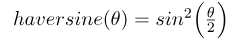

The haversine of the central angle (which is d/r) is calculated by the following formula:

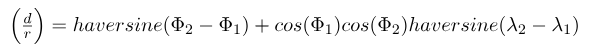


In [230]:
def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist

data['distance'] = data.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'], row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [231]:
data.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),Year,Month,Day,TimeOrder_hours,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,city_code,City_name,distance
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55:00,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Semi-Urban,46,2022,2,12,21,55,22,10,DEH,Dehradun,10.280582
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55:00,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitan,23,2022,2,13,14,55,15,5,KOC,Kochi,6.242319
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30:00,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitan,21,2022,3,4,17,30,17,40,PUNE,Pune,13.787860
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20:00,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Semi-Urban,20,2022,2,13,9,20,9,30,LUDH,Ludhiana,2.930258
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50:00,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Semi-Urban,41,2022,2,14,19,50,20,5,KNP,Kanpur,19.396618


In [232]:
data.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [233]:
data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8)].shape

(3509, 28)

In [234]:
# droping those latitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East

In [235]:
# droping where restaurant_latitude and delivery_location_latitude less than 8
data = data.drop(data[(data['Restaurant_latitude'] < 8) & (data['Delivery_location_latitude'] < 8)].index)

In [236]:
data[(data["Restaurant_latitude"]>37) & (data["Delivery_location_latitude"]>37)].shape

(0, 28)

In [237]:
# droping where restaurant_longitude and delivery_location_longitude less than 8
data[(data["Restaurant_longitude"] < 68) & (data["Delivery_location_longitude"] < 68)].shape

(0, 28)

## **(Exploratory Data Analysis) EDA**

In [238]:
min_distance=data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(1)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.83982,30.924057,75.84982


In [239]:
from branca.element import Figure

# Initialize a Folium figure
fig2 = Figure(width=850, height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(
    location=[30.914057, 75.83982],
    popup="Restaurant",
    icon=folium.Icon(color='purple', prefix='fa', icon='anchor')
).add_to(m)

# Add a marker for the delivery location
folium.Marker(
    location=[30.924057, 75.84982],
    popup="Delivery"
).add_to(m)

# Draw a line between the two locations
folium.PolyLine(
    locations=[[30.914057, 75.83982], [30.924057, 75.84982]],
    color='red',
    weight=3
).add_to(m)

# Add tile layers with proper attribution
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Terrain'
).add_to(m)

folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Toner'
).add_to(m)

folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/watercolor/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Watercolor'
).add_to(m)

folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CARTO',
    name='CartoDB Positron'
).add_to(m)

folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CARTO',
    name='White Tile (CartoDB Positron)'
).add_to(m)

# Add layer control to toggle between tile layers
folium.LayerControl().add_to(m)

# Add the map to the figure
fig2.add_child(m)


In [240]:
# maximum distance
max_distance=data.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].max().sort_values(by='distance',ascending=False).head(1)
max_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
20.969489,25.443994,81.860187,25.583994,82.000187


In [241]:
from branca.element import Figure

# Initialize a Folium figure
fig2 = Figure(width=850, height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[25.443994, 81.860187], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(
    location=[25.443994, 81.860187],
    popup="Restaurant",
    icon=folium.Icon(color='purple', prefix='fa', icon='anchor')
).add_to(m)

# Add a marker for the delivery location
folium.Marker(
    location=[25.583994, 82.000187],
    popup="Delivery"
).add_to(m)

# Draw a line between the two locations
folium.PolyLine(
    locations=[[25.443994, 81.860187], [25.583994,82.000187]],
    color='red',
    weight=3
).add_to(m)

# Add tile layers with proper attribution
folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/terrain/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Terrain'
).add_to(m)

folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/toner/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Toner'
).add_to(m)

folium.TileLayer(
    tiles='https://stamen-tiles.a.ssl.fastly.net/watercolor/{z}/{x}/{y}.png',
    attr='Map tiles by Stamen Design, CC BY 3.0 — Map data © OpenStreetMap contributors',
    name='Stamen Watercolor'
).add_to(m)

folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CARTO',
    name='CartoDB Positron'
).add_to(m)

folium.TileLayer(
    tiles='https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png',
    attr='© OpenStreetMap contributors, © CARTO',
    name='White Tile (CartoDB Positron)'
).add_to(m)

# Add layer control to toggle between tile layers
folium.LayerControl().add_to(m)

# Add the map to the figure
fig2.add_child(m)


**Which cities in India ordered more?** 

In [242]:
data.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'Year', 'Month', 'Day', 'TimeOrder_hours',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'city_code', 'City_name', 'distance'],
      dtype='object')

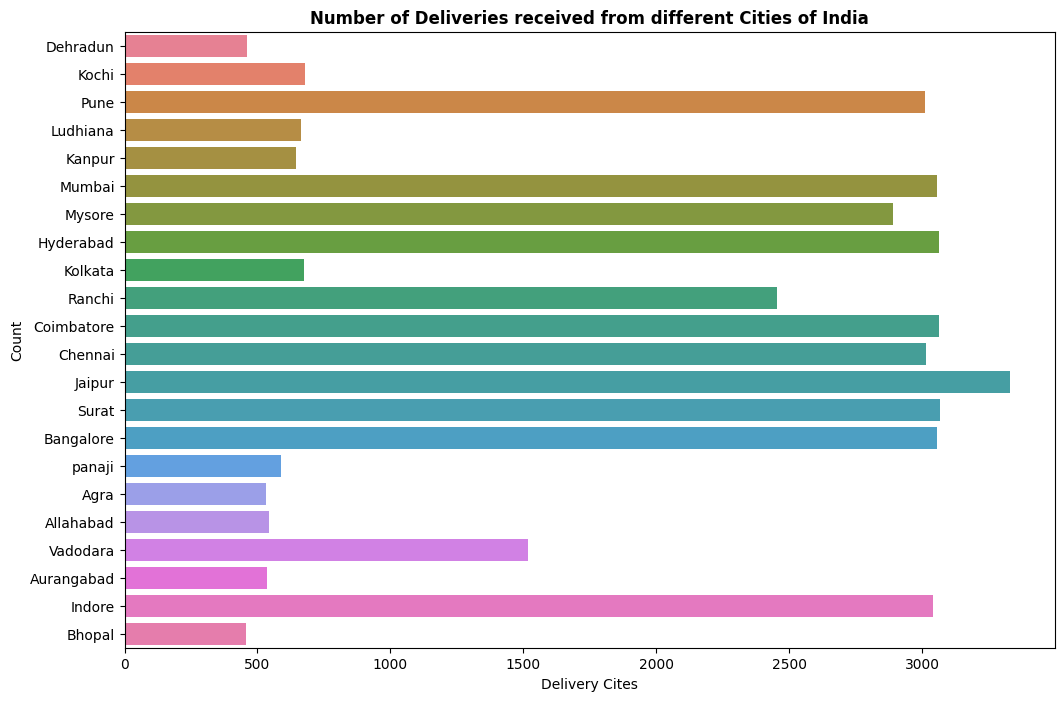

In [243]:
plt.figure(figsize=(12, 8))

sns.countplot(y=data['City_name'], palette="husl")
plt.title("Number of Deliveries received from different Cities of India", fontweight="bold")
plt.xlabel("Delivery Cites")
plt.ylabel("Count")
plt.show()

Observations: -
- Out of all the cities registered in the data, Jaipur, Pune, Mumbai, Hyderabad, Cominbatore, Surat and Indore are the cities that got highest food deliveries. 

In [244]:
data["Weather_conditions"].value_counts()

Weather_conditions
Fog           6844
Stormy        6804
Cloudy        6744
Sandstorms    6716
Windy         6675
Sunny         6561
Name: count, dtype: int64

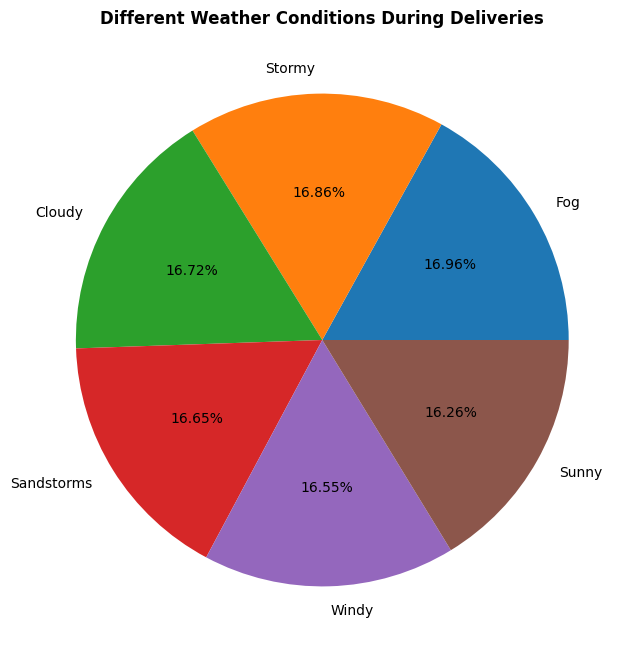

In [245]:
plt.figure(figsize=(8,8))

values = data["Weather_conditions"].value_counts()

plt.pie(x=values.values, labels=values.index, autopct="%.2f%%")
plt.title('Different Weather Conditions During Deliveries', fontweight="bold")
plt.show()

Observations: - 
- Food deliveries are don in various weather conditions like Cloudy, Stormy, Fog, Sandstorms, Windy, Sunny.
- The number of deliveries in all the weather conditions are very similar. This is quite reasonable as resently ordering food online is trending along with this the weather conditions of India are somewhat unpredictable.
- Out of all these conditions, approx. 17.02% of deliveries are done in Fog.  

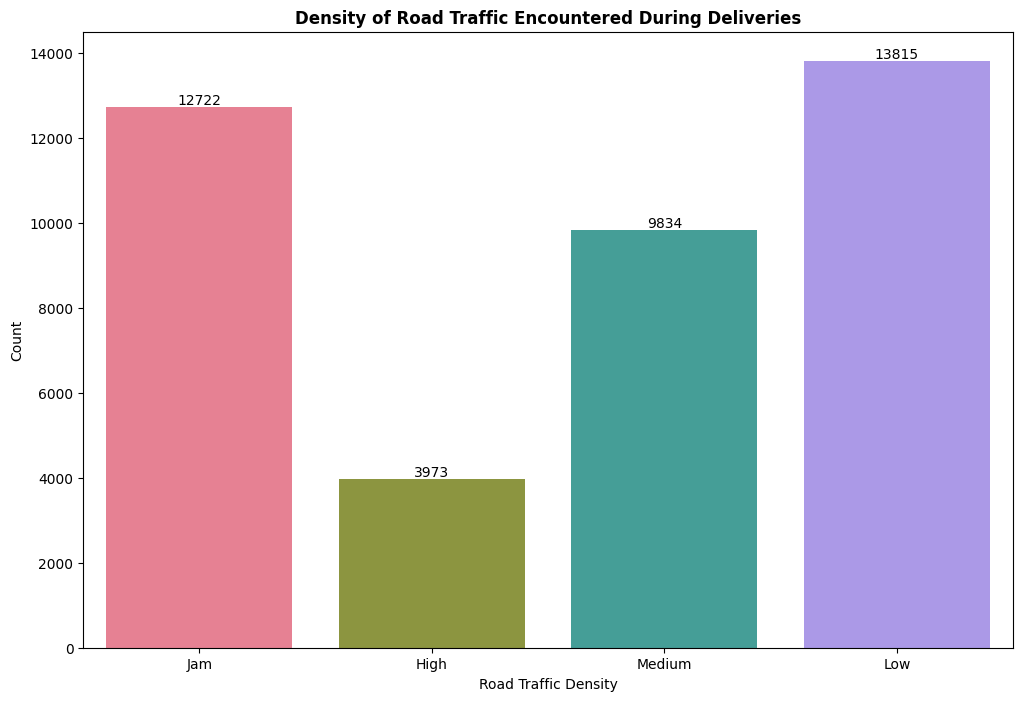

In [246]:
plt.figure(figsize=(12,8))

ax = sns.countplot(x=data['Road_traffic_density'], palette="husl")
plt.title("Density of Road Traffic Encountered During Deliveries", fontweight="bold")
plt.xlabel("Road Traffic Density")
plt.ylabel("Count")

# Adding labels on the bar top
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

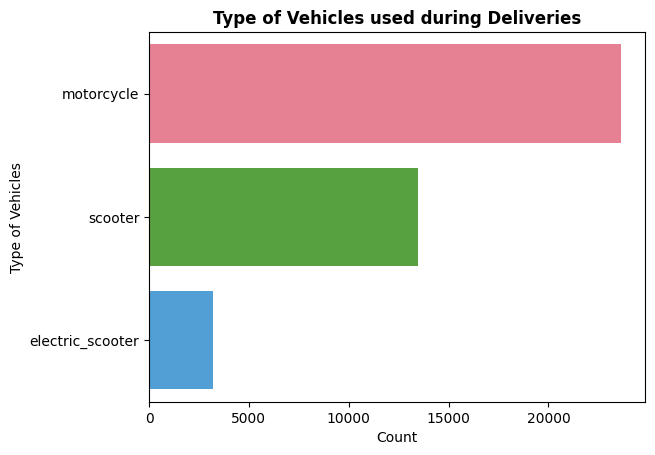

In [247]:
# checking the type of vehicles used for the deliveries
sns.countplot(data["Type_of_vehicle"], palette="husl")
plt.title("Type of Vehicles used during Deliveries", fontweight="bold")
plt.ylabel("Type of Vehicles")
plt.xlabel("Count")
plt.show()

Observations: -
- There are 3 type of vehicles used for food deliveries which are motorcycle, Scooter and Electric scooters. 
- Over 20,000 deliveries are done using Motorcycle followed by Scooter.
- All these are used for deliveries as they don't aquire much of the space and will not require muc time for deliveries.

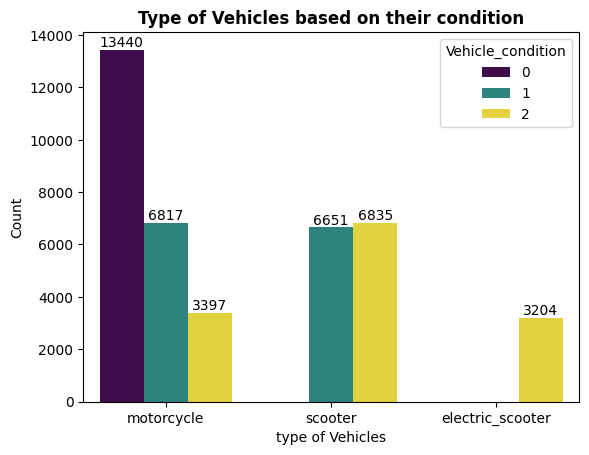

In [248]:
ax = sns.countplot(x=data["Type_of_vehicle"], hue=data["Vehicle_condition"], palette="viridis")
plt.title("Type of Vehicles based on their condition", fontweight="bold")
plt.xlabel('type of Vehicles')
plt.ylabel("Count")

for i in ax.containers:
    ax.bar_label(i, )

plt.show()

Observations: -
- The electric scooters getting used for the food deliveries are not in good conditions.

In [249]:
# exporting the data
data.to_csv("data/delivery_data(preprocessed).csv", index=False)